In [1]:
# Importar librerías
import numpy as np, matplotlib.pyplot as plt, os, glob, rasterio

In [2]:
# Seleccionar carpeta de trabajo
os.chdir(r'C:\Users\Kevin\Desktop\UNALM\OctCiclo\Senso_rem')

In [3]:
os.getcwd() # Visualizar carpeta de trabajo

'C:\\Users\\Kevin\\Desktop\\UNALM\\OctCiclo\\Senso_rem'

In [4]:
# Mediante glob cargamos las imágenes
images = glob.glob('Image\\*[1-5,7].tif')
images # Las almacena en una lista, mas no la lee como TIF

['Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B1.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B11.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B2.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B3.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B4.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B5.TIF',
 'Image\\LC08_L1TP_007068_20170424_20170502_01_T1_B7.TIF']

In [5]:
# Rasterio abre cada imagen GeoTIFF
R_B1 = rasterio.open(images[0])
R_B2 = rasterio.open(images[2])
R_B3 = rasterio.open(images[3])
R_B4 = rasterio.open(images[4])
R_B5 = rasterio.open(images[5])
# https://rasterio.readthedocs.io/en/latest/quickstart.html

In [6]:
R_B1.crs

CRS.from_epsg(32618)

In [6]:
# Podemos observar algunos atributos del archivo raster
R_B1.crs  # Coordinate Reference System

# Cantidad de bandas que la imagen contiene
R_B1.count    # Cuenta el número de bandas
R_B1.indexes  # Muestra los índices

R_B1.width  # ancho = n° columnas
R_B1.height # altura = n° filas

7721

In [7]:
# Leemos banda 1 (única en esta imagen)
Array_R_B1 = R_B1.read(1)  
Array_R_B2 = R_B2.read(1)
Array_R_B3 = R_B3.read(1)
Array_R_B4 = R_B4.read(1)
Array_R_B5 = R_B5.read(1)
# https://newbedev.com/how-to-visualize-multiband-imagery-using-rasterio

In [8]:
Array_R_B1   # Estas bandas se leen como N-dimensinal arrays

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [9]:
# Función de normalización
def Percentil(bandas):
    bandas_2 = np.nanpercentile(bandas, 2)
    bandas_98 = np.nanpercentile(bandas, 98)
    return (bandas - bandas_2)/(bandas_98 - bandas_2)
# np.nanpercentile calcula el percentil ignorando los valores nulos

In [10]:
# Normalización
B2_NDC = Percentil(Array_R_B2) # Blue
B3_NDC = Percentil(Array_R_B3) # Green
B4_NDC = Percentil(Array_R_B4) # Red
B5_NDC = Percentil(Array_R_B5)

## Gráficas

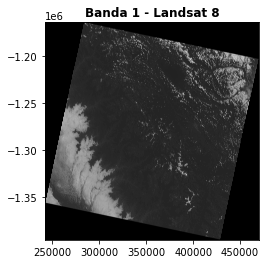

<AxesSubplot:title={'center':'Banda 1 - Landsat 8'}>

In [11]:
from rasterio.plot import show
show(R_B1.read(1), # De la imagen, elegimos qué banda queremos plotear
     transform=R_B1.transform,  # Transform permite plotear las coordenadas del SRC
     title= 'Banda 1 - Landsat 8',  # Título
     cmap = 'gray') # Color

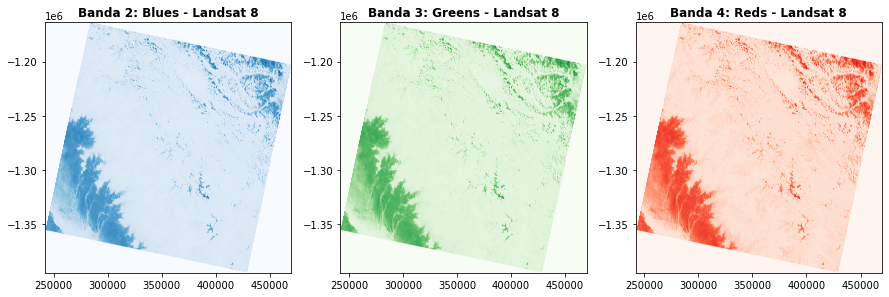

In [12]:
fig, axes = plt.subplots(1,3, figsize = (15,10))
bands = [B2_NDC, B3_NDC, B4_NDC]; color = ['Blues', 'Greens', 'Reds']
for i in range(3):
    show(bands[i], transform=R_B1.transform, cmap = color[i],
         title= f'Banda {i+2}: {color[i]} - Landsat 8', ax = axes[i])
# Reference: https://rasterio.readthedocs.io/en/latest/topics/plotting.html

In [13]:
# Combinación 4-3-2: Natural Color
natural = np.dstack((B4_NDC, B3_NDC, B2_NDC))

# Combinación 5-4-3: Color Infrared (vegetation)
Color_infrarred = np.dstack((B5_NDC, B4_NDC, B3_NDC))

# np.dstack permite concatenar matrices 2D en un tercer eje, de esta forma las superponemos
# Reference: https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


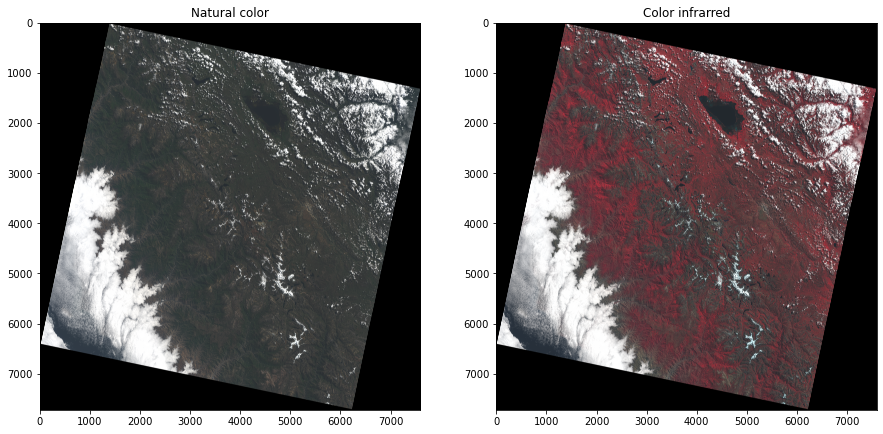

In [14]:
fig, axes = plt.subplots(1,2, figsize = (15,10))
axes[0].imshow(natural); axes[0].set_title('Natural color')
axes[1].imshow(Color_infrarred); axes[1].set_title('Color infrarred')
plt.savefig('Lab_2\\Lab2_composites.png', dpi=300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


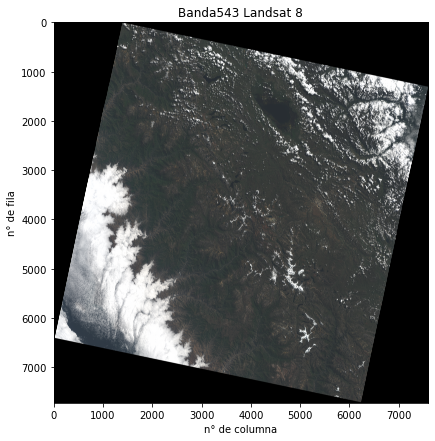

In [13]:
# Gráfica hecha en clase
# Combinación 5-4-3
"""
plt.figure(figsize = (7,7))
plt.imshow(Color_infrarred)
plt.title('Banda543 Landsat 8')
plt.xlabel('n° de columna')
plt.ylabel('n° de fila')
plt.show()"""